In [2]:
using Pkg
Pkg.activate("../")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [3]:
using Revise

In [4]:

includet("../src/ESGModels/msvar.jl")
includet("../src/ESGModels/msvar_simulate.jl") 



In [5]:
using StatsBase, Distributions, Plots, LinearAlgebra

In [6]:
Β1 = [.09 .3 .2; .03 .1 .6]
Σ1 = cor2cov([1 .3; .3 1], [.08, .03])
Β2 = [-.02 .35 .25; .035 .15 .63]
Σ2 = cor2cov([1 .35; .35 1], [.18, .035])


transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]
X = [.12, .06]

er = expected_regimes(states_zero,transition_matrix, 5)


5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [7]:
smoother(er, transition_matrix)

5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [8]:
n_samples = 1000
test_regimes = simulate_regimes(states_zero, transition_matrix, n_samples, 1)

1000×1 Matrix{Int64}:
 1
 1
 1
 1
 1
 1
 1
 1
 2
 1
 ⋮
 1
 1
 1
 2
 1
 1
 1
 1
 1

In [9]:
test_returns = simulate_msvar_returns(test_regimes, [Β1, Β2], [Σ1, Σ2], X, n_samples, 1)[:,:,1]'

1000×2 adjoint(::Matrix{Float64}) with eltype Float64:
  0.00954257  0.0609243
  0.0968683   0.0817107
  0.241873    0.108691
  0.276348    0.185651
  0.269443    0.155466
  0.196049    0.165955
  0.257035    0.14356
  0.0982365   0.157668
  0.269318    0.171121
  0.139373    0.106753
  ⋮           
  0.178258    0.118461
  0.185101    0.137686
  0.135214    0.15111
 -0.0097973   0.17909
  0.092925    0.126664
  0.277212    0.0920701
  0.180462    0.142832
  0.132841    0.134357
  0.300057    0.150845

In [10]:
Y = collect(test_returns)
T = n_samples
p = 1
X = hcat(ones(T-1), Y[p:end-1,:])

initial_states = [(transition_matrix[2,1]/(transition_matrix[2,1]+ transition_matrix[1,2])), transition_matrix[1,2]/(transition_matrix[2,1]+ transition_matrix[1,2])]

est_regimes = hamilton_filter(Y[2:end,:], X, [Β1, Β2], [Σ1, Σ2], transition_matrix, initial_states)
smoothed_regimes = smoother(est_regimes, transition_matrix)


999×2 Matrix{Float64}:
 0.870877  0.129123
 0.879791  0.120209
 0.846155  0.153845
 0.962291  0.0377094
 0.962962  0.0370378
 0.960165  0.0398352
 0.893636  0.106364
 0.921505  0.0784949
 0.986184  0.0138163
 0.989434  0.0105663
 ⋮         
 0.866248  0.133752
 0.824517  0.175483
 0.631895  0.368105
 0.258539  0.741461
 0.740002  0.259998
 0.844764  0.155236
 0.868138  0.131862
 0.882245  0.117755
 0.79495   0.20505

In [11]:
1e-2

0.01

In [12]:
sum(est_regimes, dims=2)

999×1 Matrix{Float64}:
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 1.0
 0.9999999999999999
 ⋮
 1.0
 1.0
 0.9999999999999999
 1.0
 1.0
 1.0
 1.0
 0.9999999999999999
 0.9999999999999999

In [13]:
initial_states

2-element Vector{Float64}:
 0.5714285714285715
 0.4285714285714286

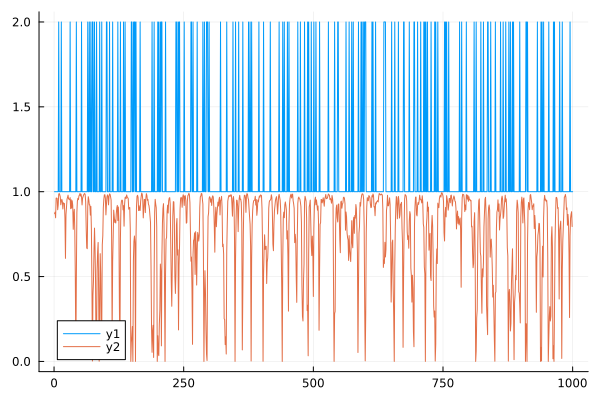

In [14]:
plot(test_regimes[:,1])
plot!(smoothed_regimes[:,1])


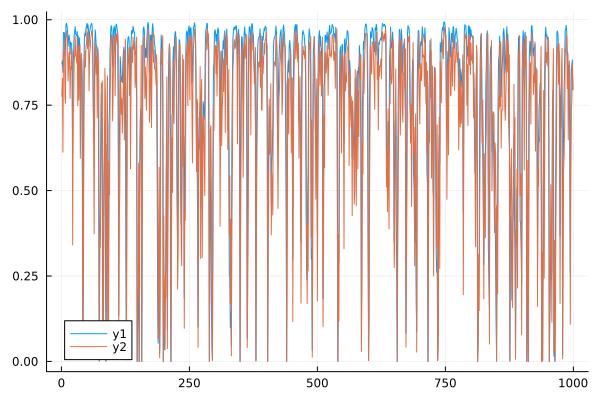

In [15]:
plot(smoothed_regimes[:,1])
plot!(est_regimes[:,1])

- Β1 = [.09 .3 .2; .03 .1 .6] 
- Σ1 = cor2cov([1 .3; .3 1], [.08, .03]) 
- Β2 = [-.02 .35 .25; .035 .15 .63] 
- Σ2 = cor2cov([1 .35; .35 1], [.18, .035]) 

In [16]:
coef, cov_matrix = est_regimes_params(Y[2:end,:], X, smoothed_regimes)

display(round.(coef[1]', digits=4))
display(round.(cov2cor(cov_matrix[1]), digits=4))
display(round.(sqrt.(diag(cov_matrix[1])), digits=4))

3×2 Matrix{Float64}:
 0.0962  0.0344
 0.2458  0.0684
 0.3581  0.6757

2×2 Matrix{Float64}:
 1.0     0.3294
 0.3294  1.0

2-element Vector{Float64}:
 0.0804
 0.035

In [17]:
display(round.(coef[2]', digits=4))
display(round.(cov2cor(cov_matrix[2]), digits=4))
display(round.(sqrt.(diag(cov_matrix[2])), digits=4))

3×2 Matrix{Float64}:
 -0.0717  0.0594
 -0.0768  0.1677
  1.1595  0.7146

2×2 Matrix{Float64}:
 1.0    0.735
 0.735  1.0

2-element Vector{Float64}:
 0.17
 0.0505

In [18]:
est_transition_matrix(smoothed_regimes, initial_states)

MethodError: MethodError: no method matching est_transition_matrix(::Matrix{Float64}, ::Vector{Float64})
The function `est_transition_matrix` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  est_transition_matrix(::Any, ::Any, !Matched::Any)
   @ Main c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\src\ESGModels\msvar.jl:112


In [19]:
tm = est_transition_matrix(er, states_zero)

MethodError: MethodError: no method matching est_transition_matrix(::Matrix{Float64}, ::Vector{Float64})
The function `est_transition_matrix` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  est_transition_matrix(::Any, ::Any, !Matched::Any)
   @ Main c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\src\ESGModels\msvar.jl:112


In [20]:
ones(2)' * Matrix(I, 2,2)

1×2 adjoint(::Vector{Float64}) with eltype Float64:
 1.0  1.0

#TODO 
- sas

In [21]:

#TODO 
#- naprawić smoother
#-zrobić własne obliczenia predict dla h+2 : Xt st1 * b1 * proba st1 * transition_matrix + xt st2 * b1 * prob st2 * transition matrix
#- zrobić testy stabilne, np seed lub porwnanie rozkładow
#reorganizować kod i testy, wdrożyć jakieś normalne środowisko

BETA coefficient
 
#Beta and intercept time varing

In [22]:
Y = [.16 .05; .13 .045; .07 .03; .08 .035; .11 .04]

X = [1. .12 .06; 1. .16 .05; 1. .13 .045; 1. .07 .03; 1. .11 .04]

regimes_probs = [.9 .1; .8 .2; .7 .3; .7 .3; .8 .2]


5×2 Matrix{Float64}:
 0.9  0.1
 0.8  0.2
 0.7  0.3
 0.7  0.3
 0.8  0.2

In [23]:
regime_matrix = diagm(regimes_probs[:,1])
Xhat = calc_xhat(X, regime_matrix) 
Β1 = calc_regime_coeficientents(Y, Xhat, regime_matrix)

U = calc_residuals(Y, Xhat, Β1)

Σ1 = calc_cov_matrix(U, regime_matrix)

display(round.(Β1, digits=4))
display(round.(cov2cor(Σ1), digits=4))
display(round.(std(Σ1), digits=4))

3×2 Matrix{Float64}:
  0.0197   0.0284
 -0.1873  -0.0301
  2.8309   0.4584

2×2 Matrix{Float64}:
 1.0     0.9867
 0.9867  1.0

0.0001

In [24]:
regime_matrix = diagm(regimes_probs[:,2])
Xhat = calc_xhat(X, regime_matrix) 
Β2 = calc_regime_coeficientents(Y, Xhat, regime_matrix)

U = calc_residuals(Y, Xhat, Β1)

Σ2 = calc_cov_matrix(U, regime_matrix)

display(round.(Β2, digits=4))
display(round.(cov2cor(Σ2), digits=4))
display(round.(sqrt.(diag(Σ2)), digits=4))

3×2 Matrix{Float64}:
 -0.1316  -0.0073
 -2.5617  -0.7141
 14.9374   3.9496

2×2 Matrix{Float64}:
 1.0     0.9877
 0.9877  1.0

2-element Vector{Float64}:
 0.0535
 0.0184

In [25]:
coef, cov_matrix = est_regimes_params(Y, X, regimes_probs)

display(round.(coef[1], digits=4))
display(round.(cov2cor(cov_matrix[1]), digits=4))
display(round.(sqrt.(diag(cov_matrix[1])), digits=4))

2×3 Matrix{Float64}:
 0.0197  -0.1873  2.8309
 0.0284  -0.0301  0.4584

2×2 Matrix{Float64}:
 1.0     0.9867
 0.9867  1.0

2-element Vector{Float64}:
 0.0157
 0.0037

In [26]:
display(round.(coef[2], digits=4))
display(round.(cov2cor(cov_matrix[2]), digits=4))
display(round.(sqrt.(diag(cov_matrix[2])), digits=4))

2×3 Matrix{Float64}:
 -0.1316  -2.5617  14.9374
 -0.0073  -0.7141   3.9496

2×2 Matrix{Float64}:
 1.0     0.9999
 0.9999  1.0

2-element Vector{Float64}:
 0.0309
 0.0088

In [27]:

regimes = [.6 .4;.75 .25; .9 .1; .9 .1; .8 .2]
r0 = [.66, .34] # initial regimes probs
s = sum(regimes, dims=1)
k = kron([1, 1], s[1,:])

4-element Vector{Float64}:
 3.95
 1.05
 3.95
 1.05

In [28]:
#transition probs from probs of regimes

k2 = [kron(r0, regimes[1,:]), kron(regimes[1,:], regimes[2,:]), kron(regimes[2,:], regimes[3,:])]
k2sum = sum(k2, dims=1)[1]



4-element Vector{Float64}:
 1.521
 0.48900000000000005
 0.729
 0.261

In [29]:
r = k2sum ./ k
r = reshape(r, (2,2))

2×2 Matrix{Float64}:
 0.385063  0.184557
 0.465714  0.248571

In [30]:
sum(r, dims=2)

2×1 Matrix{Float64}:
 0.5696202531645569
 0.7142857142857143

In [31]:
vec(transition_matrix) .* kron(smoothed_regimes[2,:] ./ est_regimes[2,:], est_regimes[1,:]) 

4-element Vector{Float64}:
 0.7001579750141097
 0.04772764529271707
 0.08135685001210881
 0.12570592600972538

In [32]:
transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]

er = expected_regimes(states_zero,transition_matrix, 5)

5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [33]:
result = zeros(5,4)
result[1,:] = kron(er[1,:], states_zero)
T = size(result)[1]

for t in 2:T
    result[t,:] = kron(er[t,:], er[t-1,:])
end

k2 = result

5×4 Matrix{Float64}:
 0.7065    0.0785    0.1935    0.0215
 0.557546  0.152704  0.227454  0.0622963
 0.469946  0.191717  0.240304  0.0980333
 0.416901  0.21318   0.244762  0.125158
 0.384067  0.225485  0.246013  0.144434

In [34]:
kron(Matrix(I, 4, 4), ones(2))

8×4 Matrix{Float64}:
 1.0  0.0  0.0  0.0
 1.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  1.0  0.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  1.0  0.0
 0.0  0.0  0.0  1.0
 0.0  0.0  0.0  1.0

In [35]:
k1 = kron(ones(2), states_zero + vec(sum(er, dims=1)))

sum(k2)[1] ./ k1

4-element Vector{Float64}:
 1.1637255938831732
 2.9352120010985763
 1.1637255938831732
 2.9352120010985763

In [36]:

transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]

regimes  = expected_regimes(states_zero, transition_matrix,  5)

smoothed_regimes = smoother(regimes, transition_matrix)


5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [37]:
vec(transition_matrix)

4-element Vector{Float64}:
 0.85
 0.2
 0.15
 0.8

In [38]:
.61 * .85

0.5185

In [39]:
using Test

In [40]:
jr = joined_regimes_probs(regimes, smoothed_regimes, states_zero, transition_matrix)
jr_sum = sum(jr, dims=1)


1×4 Matrix{Float64}:
 3.13394  0.262601  0.553049  1.05041

In [42]:
s = sum(regimes[1:end-1,:], dims=1)[1,:] + states_zero

k = kron([1, 1], s)


4-element Vector{Float64}:
 3.686993125
 1.3130068750000004
 3.686993125
 1.3130068750000004

In [43]:
e_tm = jr_sum[1,:] ./ k
e_tm = reshape(e_tm, 2, 2)

2×2 Matrix{Float64}:
 0.85  0.15
 0.2   0.8

In [44]:
sum(e_tm, dims=2)

2×1 Matrix{Float64}:
 1.0
 1.0

In [45]:
sum(jr, dims=2) .≈ 1 

5×1 BitMatrix:
 1
 1
 1
 1
 1

In [46]:
est_transition_matrix(jr, regimes, states_zero)

2×2 Matrix{Float64}:
 1.12449   0.198439
 0.216488  0.865952

In [47]:
regimes = [1. 0.; 1. 0.; 1. 0.; 1. 0.; 1. 0.]
smoothed_regimes = regimes
states_zero = [.5, .5]
transition_matrix = [.5 .5; .5 .5]

jr = joined_regimes_probs(regimes, smoothed_regimes, states_zero, transition_matrix)

5×4 Matrix{Float64}:
 0.25  0.25  NaN    NaN
 1.0   0.0     0.0    0.0
 1.0   0.0     0.0    0.0
 1.0   0.0     0.0    0.0
 1.0   0.0     0.0    0.0

In [48]:
#vec(transition_matrix) .* (kron(smoothed_regimes[1,:] ./ regimes[1,:], states_zero))

smoothed_regimes[1,:] ./ regimes[1,:]

2-element Vector{Float64}:
   1.0
 NaN

In [49]:
size(transition_matrix,1)

2

In [50]:
initial_states_probs

UndefVarError: UndefVarError: `initial_states_probs` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [51]:
P = transition_matrix
N = size(P, 1)
    
    # Construct the matrix A for solving Ax = b where x is π
A = [P' - I; ones(1, N)]

b = [zeros(N); 1.0]
    
    # Solve for π using backslash operator (Gaussian elimination)
π = A \ b

2-element Vector{Float64}:
 0.5000000000000002
 0.4999999999999999

In [52]:
initial_regimes_probs(transition_matrix)

2-element Vector{Float64}:
 0.5000000000000002
 0.4999999999999999

In [53]:
@test initial_states ≈ π atol=0.0001

Test Failed at c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner\_wip\jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_Y105sZmlsZQ==.jl:1
  Expression: ≈(initial_states, π, atol = 0.0001)
   Evaluated: [0.5714285714285715, 0.4285714285714286] ≈ [0.5000000000000002, 0.4999999999999999] (atol=0.0001)



Test.FallbackTestSetException: Test.FallbackTestSetException("There was an error during testing")

In [54]:
expected_regimes( states_zero, transition_matrix, 3)

3×2 Matrix{Float64}:
 0.5  0.5
 0.5  0.5
 0.5  0.5

In [55]:
Β1 = [.09 .3 .2; .03 .1 .6]
Σ1 = cor2cov([1 .3; .3 1], [.08, .03])
Β2 = [-.02 .35 .25; .035 .15 .63]
Σ2 = cor2cov([1 .35; .35 1], [.18, .035])


transition_matrix = [.9 .1;.2 .8]

states_zero = [.9, .1]

Y = [.16 .05; .13 .045; .07 .03; .08 .035; .11 .04]

X = [1. .12 .06; 1. .16 .05; 1. .13 .045; 1. .07 .03; 1. .11 .04]

log_likehood(Y, X, [Β1, Β2], [Σ1, Σ2], transition_matrix, states_zero)

17.530266756846856 + 0.0im

expectation maximisation algorythm
initial values
- filter
- smoot
- regresors
- covariance
- transition matrix
- zero regimes
  

In [56]:
transition_matrix = [.85 .15;.2 .8]

states_zero = [.9, .1]


er = expected_regimes(states_zero,transition_matrix, 5)
#er = [1 0; 1 0; 1 0; 1 0; 1 0;] .+ 1e-12

5×2 Matrix{Float64}:
 0.785     0.215
 0.71025   0.28975
 0.661663  0.338338
 0.630081  0.369919
 0.609552  0.390448

In [75]:
jr = joined_regimes_probs(er, er, initial_regimes_probs(transition_matrix), transition_matrix)
sum_jr = sum(jr, dims=1)[1,:]

4-element Vector{Float64}:
 2.8546584419642858
 0.32831566071428575
 0.5037632544642857
 1.313262642857143

In [76]:
ξ1 = kron(ones(2)', Matrix(I, 2, 2)) * sum_jr

2-element Vector{Float64}:
 3.3584216964285716
 1.6415783035714289

In [80]:
e_tm = sum_jr ./ kron(ones(2), ξ1)

e_tm = reshape(e_tm, 2,2)


2×2 Matrix{Float64}:
 0.85  0.15
 0.2   0.8

In [81]:
est_transition_matrix(jr)

2×2 Matrix{Float64}:
 0.85  0.15
 0.2   0.8

In [87]:
r = [1. 0.; 1. 0.; 1. 0.; 1. 0.; 1. 0.; 1. 0.; 1. 0.; 1. 0.;] .+ 1e-12
transition_matrix = [.85 .15;.2 .8]


jr = joined_regimes_probs(r, r, initial_regimes_probs(transition_matrix), transition_matrix)

est_transition_matrix(jr[2:end,:])

2×2 Matrix{Float64}:
 1.0  1.0e-12
 1.0  2.26667e-11